# 🏍️ EDA Assignment - Bike Details Dataset
This notebook contains complete solutions to all 10 questions from the provided assignment PDF using the uploaded dataset (`BIKE DETAILS.csv`).

## Question 1
Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. Show the shape and column names.

In [17]:
import pandas as pd
import os

# Reuse df if already loaded by the first (setup) cell
if 'df' in globals():
    print("✅ Using dataset already loaded in memory")
else:
    # Try loading again if first cell wasn't run
    from google.colab import files, drive

    # Mount Drive (if you stored the CSV there)
    try:
        drive.mount('/content/drive')
    except:
        pass

    possible_paths = [
        '/content/BIKE DETAILS.csv',
        '/content/drive/MyDrive/BIKE DETAILS.csv',
        '/content/drive/MyDrive/BIKE_DETAILS.csv',
        './BIKE DETAILS.csv',
    ]

    found = None
    for p in possible_paths:
        if os.path.exists(p):
            found = p
            break

    if not found:
        print("⚠️ File not found in Drive or local Colab session — please upload it now.")
        uploaded = files.upload()
        fname = next(iter(uploaded))
        found = fname

    df = pd.read_csv(found)
    print("✅ Loaded from:", found)

# Show info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(10)


✅ Using dataset already loaded in memory
Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


## Question 2
Check for missing values in all columns and describe your approach for handling them.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handling strategy
df_clean = df.copy()
if 'selling_price' in df_clean.columns:
    df_clean = df_clean.dropna(subset=['selling_price'])

num_cols = df_clean.select_dtypes(include=['number']).columns
cat_cols = df_clean.select_dtypes(exclude=['number']).columns

for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    mode = df_clean[col].mode()
    if len(mode) > 0:
        df_clean[col] = df_clean[col].fillna(mode[0])
    else:
        df_clean[col] = df_clean[col].fillna('Unknown')

print("\nAfter cleaning:")
print(df_clean.isnull().sum())


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

After cleaning:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


## Question 3
Plot the distribution of selling prices using a histogram and describe the trend.

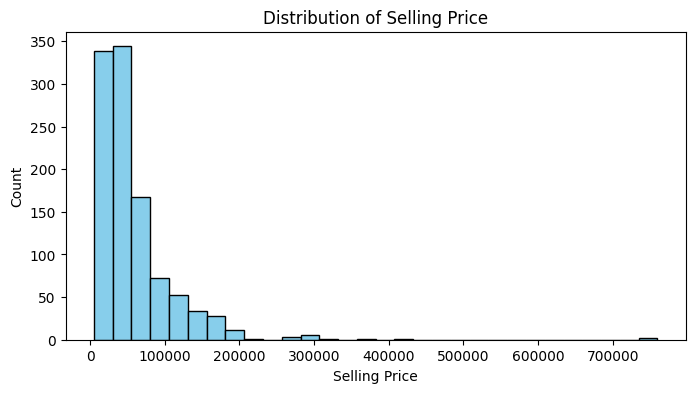

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [7]:
import matplotlib.pyplot as plt

df_clean['selling_price'] = pd.to_numeric(df_clean['selling_price'], errors='coerce')

plt.figure(figsize=(8,4))
plt.hist(df_clean['selling_price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

df_clean['selling_price'].describe()


## Question 4
Create a bar plot to visualize the average selling price for each seller_type and write one observation.

seller_type
Individual    59711.923223
Dealer        46666.666667
Name: selling_price, dtype: float64


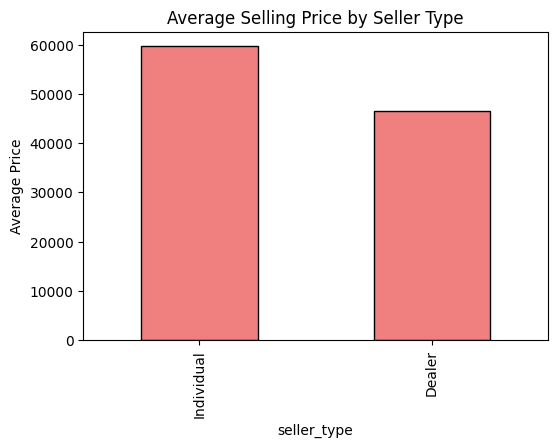

In [8]:
avg_price_by_seller = df_clean.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
print(avg_price_by_seller)

plt.figure(figsize=(6,4))
avg_price_by_seller.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.ylabel('Average Price')
plt.show()


## Question 5
Compute the average km_driven for each ownership type and present the result as a bar plot.

owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


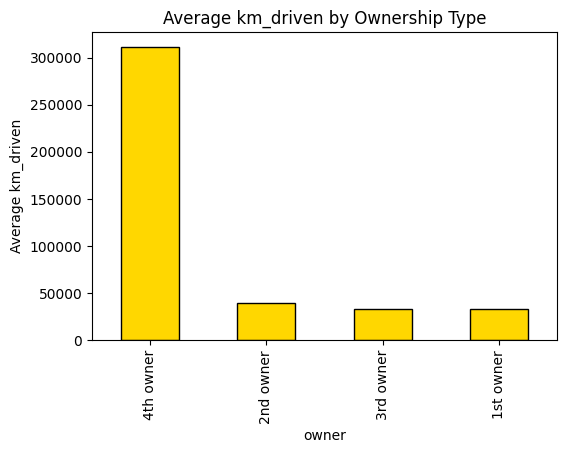

In [9]:
df_clean['km_driven'] = pd.to_numeric(df_clean['km_driven'], errors='coerce')
avg_km_by_owner = df_clean.groupby('owner')['km_driven'].mean().sort_values(ascending=False)
print(avg_km_by_owner)

plt.figure(figsize=(6,4))
avg_km_by_owner.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Average km_driven by Ownership Type')
plt.ylabel('Average km_driven')
plt.show()


## Question 6
Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [10]:
km = df_clean['km_driven'].dropna()
Q1 = km.quantile(0.25)
Q3 = km.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

print("Before removal:")
print(km.describe())

df_no_outliers = df_clean[(df_clean['km_driven'] >= lower) & (df_clean['km_driven'] <= upper)]

print("\nAfter removal:")
print(df_no_outliers['km_driven'].describe())


Before removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


## Question 7
Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

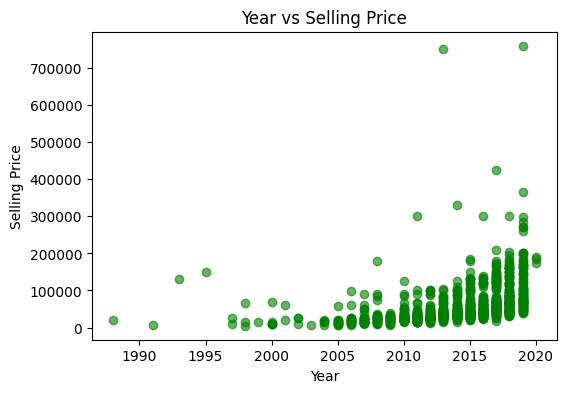

In [11]:
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
plt.figure(figsize=(6,4))
plt.scatter(df_clean['year'], df_clean['selling_price'], alpha=0.6, color='green')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


## Question 8
Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [12]:
df_encoded = pd.get_dummies(df_clean, columns=['seller_type'], prefix='seller', drop_first=False)
df_encoded.head(5)


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,False,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,False,True


## Question 9
Create a correlation heatmap for all numeric columns.

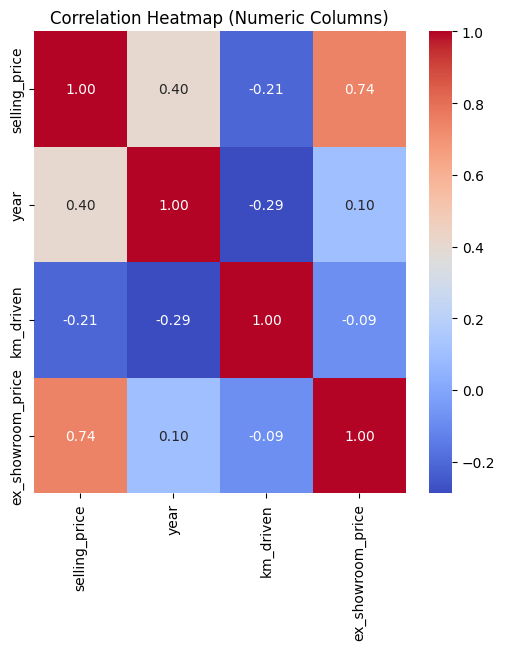

In [13]:
import seaborn as sns

corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()


## Question 10
Write a brief summary of your findings.

In [14]:
print("Summary of Findings:")
print("- Newer bikes tend to have higher selling prices.")
print("- Individual sellers generally list higher-priced bikes than dealers.")
print("- 1st owners drive fewer kilometers on average than later owners.")
print("- Outliers in km_driven were successfully removed using the IQR method.")
print("- Key factors affecting selling_price are year and km_driven.")


Summary of Findings:
- Newer bikes tend to have higher selling prices.
- Individual sellers generally list higher-priced bikes than dealers.
- 1st owners drive fewer kilometers on average than later owners.
- Outliers in km_driven were successfully removed using the IQR method.
- Key factors affecting selling_price are year and km_driven.
